<a href="https://colab.research.google.com/github/muhammaddaffa50/computer_vision/blob/main/Artificial_Neural_Network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Download dataset
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1A9XAMCPm8xSpPwSpeqm8lEqX_cmoFDpj' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1A9XAMCPm8xSpPwSpeqm8lEqX_cmoFDpj" -O /tmp/daun.zip && rm -rf /tmp/cookies.txt

--2021-11-16 13:27:25--  https://docs.google.com/uc?export=download&confirm=&id=1A9XAMCPm8xSpPwSpeqm8lEqX_cmoFDpj
Resolving docs.google.com (docs.google.com)... 108.177.121.101, 108.177.121.113, 108.177.121.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.121.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-00-docs.googleusercontent.com/docs/securesc/djjosdj35es20ar44pc027o5loovqqgl/sm2dok49jvlq5tmhrd8d142cnnkdta5m/1637069175000/05200325421108249014/09601226931011884330Z/1A9XAMCPm8xSpPwSpeqm8lEqX_cmoFDpj?e=download [following]
--2021-11-16 13:27:26--  https://doc-0o-00-docs.googleusercontent.com/docs/securesc/djjosdj35es20ar44pc027o5loovqqgl/sm2dok49jvlq5tmhrd8d142cnnkdta5m/1637069175000/05200325421108249014/09601226931011884330Z/1A9XAMCPm8xSpPwSpeqm8lEqX_cmoFDpj?e=download
Resolving doc-0o-00-docs.googleusercontent.com (doc-0o-00-docs.googleusercontent.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connectin

In [16]:
import os
import zipfile

local_zip = '/tmp/daun.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [17]:
base_dir = '/tmp/daun'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_belimbingwuluh_dir = os.path.join(train_dir, 'belimbingwuluh')
train_jeruknipis_dir = os.path.join(train_dir, 'jeruknipis')

validation_belimbingwuluh_dir = os.path.join(validation_dir, 'belimbingwuluh')
validation_jeruknipis_dir = os.path.join(validation_dir, 'jeruknipis')

In [18]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_belimbingwuluh_dir)[:10])
print(os.listdir(train_jeruknipis_dir)[:10])

['belimbing wuluh-025.png', 'belimbing wuluh-029.png', 'belimbing wuluh-023.png', 'belimbing wuluh-034.png', 'belimbing wuluh-033.png', 'belimbing wuluh-026.png', 'belimbing wuluh-012.png', 'belimbing wuluh-032.png', 'belimbing wuluh-007.png', 'belimbing wuluh-004.png']
['jeruk nipis-055.png', 'jeruk nipis-061.png', 'jeruk nipis-057.png', 'jeruk nipis-058.png', 'jeruk nipis-053.png', 'jeruk nipis-083.png', 'jeruk nipis-085.png', 'jeruk nipis-070.png', 'jeruk nipis-077.png', 'jeruk nipis-069.png']


In [19]:
# Cek jumlah data train dan data validation
print('total training belimbingwuluh images:', len(os.listdir(train_belimbingwuluh_dir)))
print('total training jeruknipis images:', len(os.listdir(train_jeruknipis_dir)))
print('total validation belimbingwuluh images:', len(os.listdir(validation_belimbingwuluh_dir)))
print('total validation jeruknipis images:', len(os.listdir(validation_jeruknipis_dir)))

total training belimbingwuluh images: 35
total training jeruknipis images: 35
total validation belimbingwuluh images: 15
total validation jeruknipis images: 15


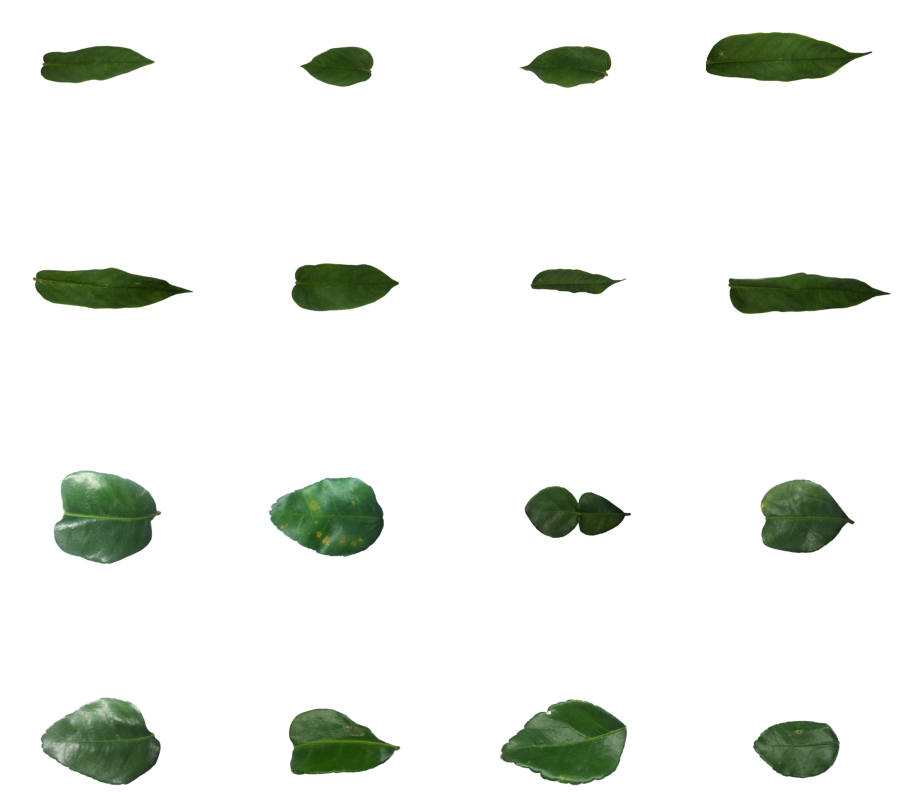

In [22]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_wuluh_pix = [os.path.join(train_belimbingwuluh_dir, fname) 
                for fname in os.listdir(train_belimbingwuluh_dir)[pic_index-8:pic_index]]
next_nipis_pix = [os.path.join(train_jeruknipis_dir, fname) 
                for fname in os.listdir(train_jeruknipis_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_wuluh_pix+next_nipis_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [23]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [24]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [25]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (70, 150, 150, 3)
Train Label =  (70,)
Validation Data =  (30, 150, 150, 3)
Validation Label =  (30,)


In [36]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [37]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[30:40])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[30:40])

Label sebelum di-encoder  ['jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh']
Label setelah di-encoder  [1 1 1 1 1 0 0 0 0 0]


<h3>Definisikan Model</h3>

In [38]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [39]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [40]:
# Tampilkan model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8640128   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [41]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [42]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
4/4 [==============================] - 1s 97ms/step - loss: 56.6182 - acc: 0.4429 - val_loss: 8.5611 - val_acc: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 60ms/step - loss: 5.6564 - acc: 0.5714 - val_loss: 3.4422 - val_acc: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 55ms/step - loss: 3.3131 - acc: 0.5000 - val_loss: 1.3950 - val_acc: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 56ms/step - loss: 0.8502 - acc: 0.5571 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/50
4/4 [==============================] - 0s 55ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/50
4/4 [==============================] - 0s 56ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/50
4/4 [==============================] - 0s 57ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/50
4/4 [==============================] - 0s 59ms/step - loss: 0.6931 - acc: 0.5000 - va

<h3>Evaluasi Model</h3>

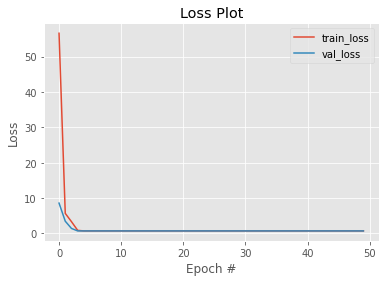

In [43]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

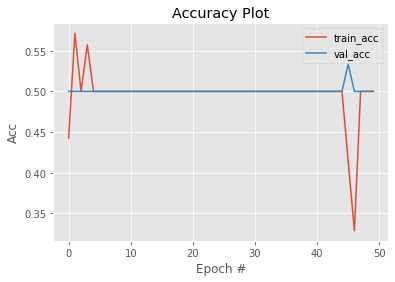

In [44]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.50      1.00      0.67        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
